INFO: Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO: NumExpr defaulting to 8 threads.


(88, 120, 3)


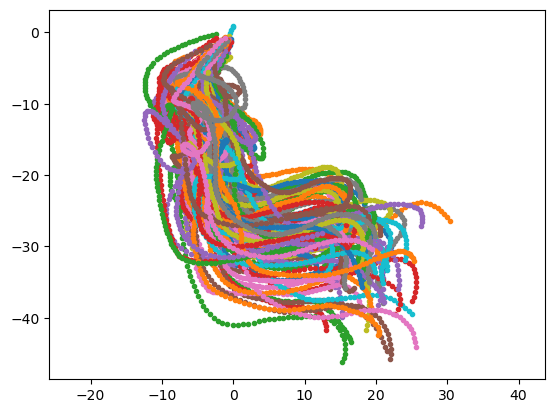

In [11]:
import numpy as np 
import glob 
import vtk
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from AngioMorphPCA.preprocessing import parameterize_curve, calculate_3d_curve_abscissas,remove_high_freq_components, min_max_normalize, autocovariance_function
from AngioMorphPCA.io import Get_simple_vtk, makeVtkFile
from scipy.integrate import simps
from AngioMorphPCA.GenerateDiffHemeo import generate_diff_homeomorphism
from AngioMorphPCA.srvf_rep import compute_srvf_func, reconstruct_curve_from_srvf
from AngioMorphPCA.L2distance import calculate_l2_distance
from AngioMorphPCA.compute_geometry import compute_curvature_and_torsion,build_curve_from_curvatures
from tqdm import tqdm
import matplotlib.pyplot as plts
import warnings
import matplotlib.pyplot as plt
from geomstats.learning.frechet_mean import FrechetMean
import geomstats.backend as gs
from geomstats.geometry.discrete_curves import (
    DiscreteCurvesStartingAtOrigin,
    SRVMetric,
    insert_zeros,
)
from geomstats.learning.pca import TangentPCA
import seaborn as sns
import matplotlib.cm as cm
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.spatial import procrustes
from scipy.linalg import orthogonal_procrustes
from AngioMorphPCA.cut_centerline import read_vtk_curve, cut_curve, interpolate_curve, write_vtk_curve


coords_list_after = np.load("../coords_list_after.npy")
print (coords_list_after.shape)


for i in range(0, coords_list_after.shape[0]):
    plt.plot(coords_list_after[i,:,0], coords_list_after[i,:,1], '.')
    plt.axis('equal')

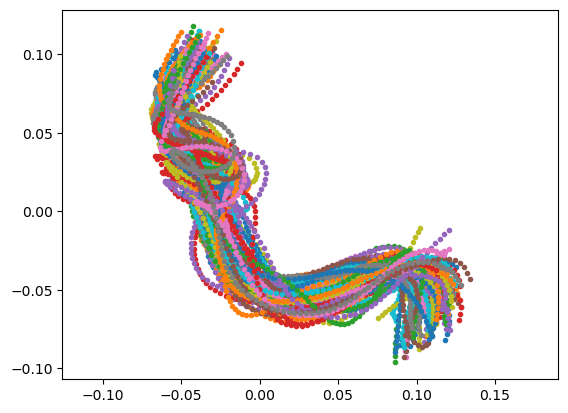

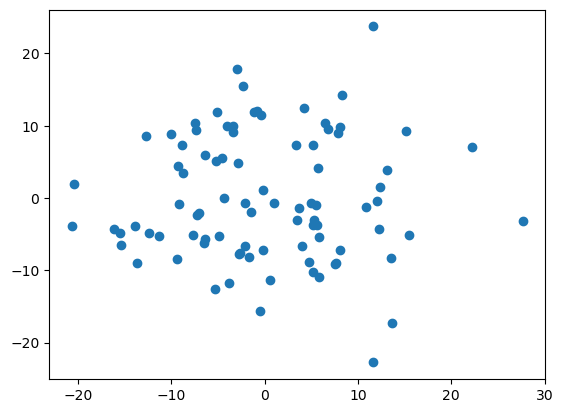

In [15]:
def align_centerlines_procrustes(original_centerlines):
    num_curves, num_points, dim = original_centerlines.shape
    
    # 选择第一条曲线作为参考
    reference_curve = original_centerlines[0]

    aligned_centerlines = np.zeros_like(original_centerlines)

    for i in range(num_curves):
        _, aligned_curve, _ = procrustes(reference_curve, original_centerlines[i])
        aligned_centerlines[i] = aligned_curve

    return aligned_centerlines

aligned_coords = align_centerlines_procrustes(coords_list_after)

for i in range(0, aligned_coords.shape[0]):
    plt.plot(aligned_coords[i,:,0], aligned_coords[i,:,1], '.')
    plt.axis('equal')
plt.show()

pca = PCA(n_components=2)
standscaler = StandardScaler()
std_aligned_coords = standscaler.fit_transform(aligned_coords.reshape(aligned_coords.shape[0], -1))
result = pca.fit_transform(std_aligned_coords)
plt.scatter(result[:,0], result[:,1])
plt.show()